In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

C:\Users\HP\anaconda3\envs\DL\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\envs\DL\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\envs\DL\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\envs\DL\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

In [3]:
from sklearn.model_selection import train_test_split
import os

In [4]:
np.random.seed(1)

In [5]:
train_images = []
train_labels = []
shape = (200,200)

train_datasets_path ="C:/Users/HP/DL_Project/datasets/train_zip/train/"
for filename in os.listdir("C:/Users/HP/DL_Project/datasets/train_zip/train/"):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_datasets_path,filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(train_images,train_labels,random_state=1)

In [7]:
test_images = []
test_labels = []
shape = (200, 200)

test_datasets_path ="C:/Users/HP/DL_Project/datasets/test_zip/test/"

for filename in os.listdir("C:/Users/HP/DL_Project/datasets/test_zip/test/"):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_datasets_path, filename))
        test_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
        

test_images = np.array(test_images)

In [8]:
model = Sequential()
#1st input layer 
model.add(Conv2D(kernel_size=(3,3), filters=32,activation = 'tanh',input_shape=(200,200,3)))

#1st Hidden Layer
model.add(Conv2D(filters = 30, kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D((2,2)))

#2nd Hidden Layer
model.add(Conv2D(filters = 30, kernel_size = (3,3), activation='tanh'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters = 30, kernel_size = (3,3), activation='tanh'))
model.add(Flatten())

model.add(Dense(20,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['acc'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

In [11]:
model_data = model.fit(x_train,
                      y_train,epochs=5,
                      batch_size = 50,
                      validation_data=(x_test,y_test))

Train on 180 samples, validate on 60 samples
Epoch 1/5
180/180 [==============================] - 18s 98ms/sample - loss: 4.5980 - acc: 0.3722 - val_loss: 1.0313 - val_acc: 0.5667
Epoch 2/5
180/180 [==============================] - 18s 101ms/sample - loss: 2.3322 - acc: 0.4167 - val_loss: 1.0920 - val_acc: 0.5667
Epoch 3/5
180/180 [==============================] - 18s 99ms/sample - loss: 1.5048 - acc: 0.5611 - val_loss: 0.7938 - val_acc: 0.8000
Epoch 4/5
180/180 [==============================] - 18s 98ms/sample - loss: 0.8413 - acc: 0.7667 - val_loss: 1.2014 - val_acc: 0.5667
Epoch 5/5
180/180 [==============================] - 18s 100ms/sample - loss: 0.8131 - acc: 0.6722 - val_loss: 0.6373 - val_acc: 0.7500


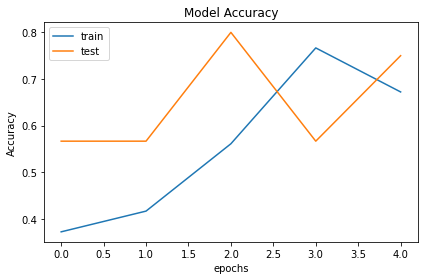

In [12]:
plt.plot(model_data.history['acc'])
plt.plot(model_data.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

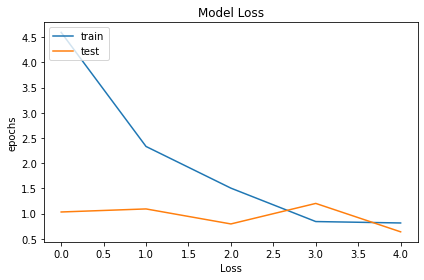

In [13]:
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("epochs")
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [14]:
model_evaluate = model.evaluate(x_test,y_test)

60/60 [==============================] - 1s 20ms/sample - loss: 0.6373 - acc: 0.7500


In [15]:
print(model_evaluate)

[0.637256117661794, 0.75]


In [16]:
image_name= test_images[0:1]
label_names = test_labels[0:1]

predicted = model.predict(np.array(image_name))
output = {0:"apple",
         1:"banana",
         2:"mixed",
         3:"orange"}

print("Actual values names: \t", label_names)
print("Pridicted Values names: \t", output[np.argmax(predicted)])

Actual values names: 	 ['apple']
Pridicted Values names: 	 apple
